# MLP

## Preparación

### Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data management (dataframes)
import matplotlib.pyplot as plt
import seaborn as sns  # plotting

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.inspection import permutation_importance

# stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

from sklearn.linear_model  import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

#from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# others
from mltools import classification_tools as CT
from mltools import model_tools as MT

In [2]:
### Load libraries ###

# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
import math
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import set_config
set_config(display='diagram')

# REGRESSION TOOLS - Custom library
from mltools import regression_tools as RT
from mltools import model_tools as MT
from neuralsens import partial_derivatives as ns

### Carga de datos

In [3]:
# Load file with the dataset with irradiance data
df_irradiance = pd.read_csv('./data/G04A_DATOS_IRRAD.csv', sep = ",")
df_irradiance.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.47,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.66,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.12,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.50,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.16,0.0,0.0,2015,1,5,0


In [4]:
### Load file for the solar power utilization
df_util = pd.read_csv('./data/G04A_DATOS_UTIL.csv', sep = ",")
df_util.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000023,0.000008,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.000012,0.000004,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.000008,0.000000,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.000008,0.000000,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.000008,0.000008,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0


In [5]:
df_aux = pd.merge(df_irradiance, df_util, on='FECHA')
df_aux

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO_x,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO_y,MES_y,DIA_y,DIASEM_y
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.470,0.0,0.0,2015,...,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.660,0.0,0.0,2015,...,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.120,0.0,0.0,2015,...,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.500,0.0,0.0,2015,...,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.160,0.0,0.0,2015,...,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.0,0.0,0.0,176437.95,596362.94,213554.200,0.0,0.0,2020,...,0.012102,0.068252,0.070849,0.012841,0.000003,0.000003,2020,12,27,6
2188,2020-12-28,0.0,0.0,0.0,573497.50,1097877.50,269206.560,0.0,0.0,2020,...,0.032334,0.334919,0.285503,0.046018,0.000003,0.000007,2020,12,28,0
2189,2020-12-29,0.0,0.0,0.0,425860.56,801252.40,237152.560,0.0,0.0,2020,...,0.023633,0.245105,0.282372,0.017419,0.000007,0.000007,2020,12,29,1
2190,2020-12-30,0.0,0.0,0.0,214860.45,321715.56,29951.986,0.0,0.0,2020,...,0.010654,0.134742,0.076885,0.005577,0.000010,0.000000,2020,12,30,2


In [6]:
# Lista de identificadores comunes
id_vars = ['FECHA', 'ANNO_x', 'MES_x', 'DIA_x', 'DIASEM_x']

# Melt para irradiancia
irrad_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21'], var_name='HOUR', value_name='IRRAD_VALUE')

# Melt para utilidad
util_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21'], var_name='HOUR', value_name='UTIL_VALUE')

# Ajustar las columnas 'HOUR' para que coincidan y permitan un merge adecuado
irrad_melt['HOUR'] = irrad_melt['HOUR'].str.extract('(\d+)')
util_melt['HOUR'] = util_melt['HOUR'].str.extract('(\d+)')

# Realizar un merge de los DataFrames basado en las columnas comunes, incluida la 'HOUR'
df = pd.merge(irrad_melt, util_melt, on=id_vars + ['HOUR'])

df['FECHA'] = pd.to_datetime(df['FECHA'])

df['HOUR'] = df['HOUR'].astype(int)

df = df.drop(['DIASEM_x'], axis=1)
# Crea la nueva columna 'dia_mes' extrayendo el día del año
df['dia_mes'] = df['FECHA'].dt.dayofyear

df = df.drop(['FECHA'], axis=1)

df

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,0,0.0,0.000023,1
1,2015,1,2,0,0.0,0.000012,2
2,2015,1,3,0,0.0,0.000008,3
3,2015,1,4,0,0.0,0.000008,4
4,2015,1,5,0,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


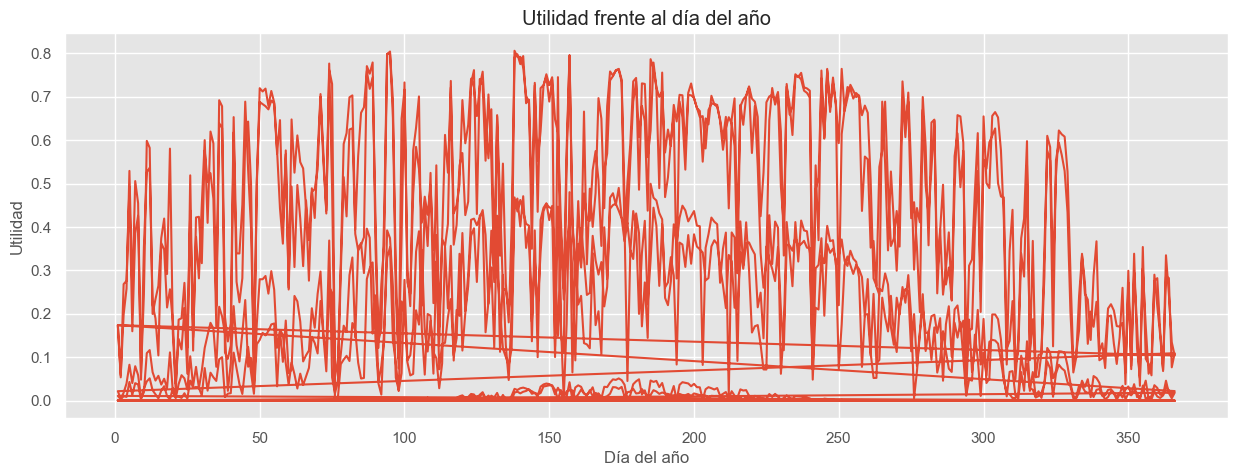

In [19]:
df_2015 = df[df['ANNO_x'] == 2020]

# Sacamos una gráfica de UTIL_VALUE frente a dia_mes
plt.figure(figsize=(15, 5))
plt.plot(df_2015['dia_mes'], df_2015['UTIL_VALUE'])
plt.xlabel('Día del año')
plt.ylabel('Utilidad')
plt.title('Utilidad frente al día del año')
plt.show()

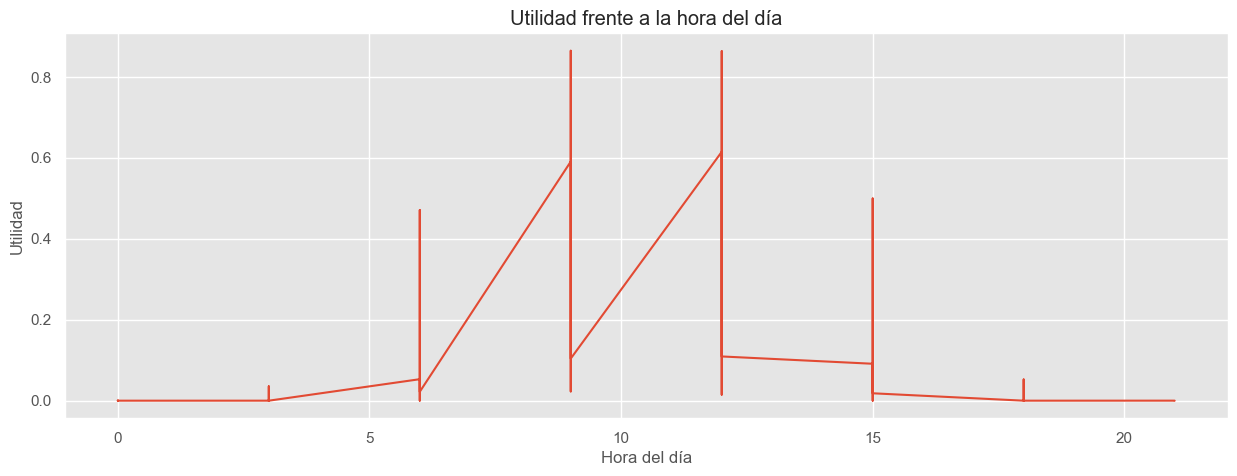

In [21]:
# Sacamos una gráfica de UTIL_VALUE frente a HOUR
plt.figure(figsize=(15, 5))
plt.plot(df['HOUR'], df['UTIL_VALUE'])
plt.xlabel('Hora del día')
plt.ylabel('Utilidad')
plt.title('Utilidad frente a la hora del día')
plt.show()

### Dividir en train y test

In [7]:
OUTPUT = 'UTIL_VALUE'
X = df.drop(columns=[OUTPUT])
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0) #seed for replication

## Modelos

### Linear Regression

In [65]:
INPUTS_LR_NUM = ["dia_mes","IRRAD_VALUE"]
INPUTS_LR_CAT = ["HOUR"]
INPUTS_LR = INPUTS_LR_NUM + INPUTS_LR_CAT

# Prepare the numeric variables by imputing by scaling
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Prepare the categorical variables by encoding the categories
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))])

# Create a preprocessor to perform the steps defined above
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, INPUTS_LR_NUM),
        ('cat', categorical_transformer, INPUTS_LR_CAT)
        ])

pipe = Pipeline(steps=[('Prep',preprocessor), # Preprocess the variables when training the model 
                        ('LinReg',LinearRegressor())]) 


# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
param = {'LinReg__fit_intercept': [True, False],
         'LinReg__normalize': [True, False]}
LR_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                        param_grid=param, # Defined grid to search in
                        n_jobs=-1, # Number of cores to use (parallelize)
                        cv=nFolds) # Number of Folds 
LR_fit.fit(X_train[INPUTS_LR], y_train) # Search in grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dia_mes',
                                                                          'IRRAD_VALUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['HOUR'])])),
                                       ('LinReg', LinearRegressor())]),
             n_jobs=-1,
             param_grid={'LinReg__fit_intercept': [True, False],
                         'LinReg__normalize': [True, False]})

In [66]:
LR_fit.best_estimator_['LinReg'].summary(LR_fit.best_estimator_['Prep'].get_feature_names_out())

                            OLS Regression Results                            
Dep. Variable:             UTIL_VALUE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:04:44   Log-Likelihood:                 16381.
No. Observations:               14028   AIC:                        -3.274e+04
Df Residuals:                   14018   BIC:                        -3.267e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
var                       coef            std err         t               P>|t|          
---------------------------------------------------------------------------
num__dia_mes              0.128           0.

In [67]:
dfTR_eval = X_train.copy()
dfTR_eval['charges'] = y_train
dfTS_eval = X_test.copy()
dfTS_eval['charges'] = y_test

In [68]:
dfTR_eval['LR_pred'] = LR_fit.predict(X_train)
dfTS_eval['LR_pred'] = LR_fit.predict(X_test)

In [69]:
#Training and test MAE - Mean Absolute error
print('Training MAE:',mean_absolute_error(dfTR_eval['charges'], dfTR_eval['LR_pred']))
print('Test MAE:',mean_absolute_error(dfTS_eval['charges'], dfTS_eval['LR_pred']))

Training MAE: 0.04443701124946215
Test MAE: 0.04612226346827418


In [70]:
#Training and test RMSE - Root Mean Square Error
print('Training RMSE:',math.sqrt(mean_squared_error(dfTR_eval['charges'], dfTR_eval['LR_pred'])))
print('Test RMSE:',math.sqrt(mean_squared_error(dfTS_eval['charges'], dfTS_eval['LR_pred'])))

Training RMSE: 0.07527194299203145
Test RMSE: 0.07635744933388579


In [71]:
#Training and test r^2 
print('Training R2:',r2_score(dfTR_eval['charges'], dfTR_eval['LR_pred']))
print('Test R2:',r2_score(dfTS_eval['charges'], dfTS_eval['LR_pred']))

Training R2: 0.9051819030068604
Test R2: 0.9044024449895861


### Stacking

In [9]:
degree_poly = 15

n_knots_spline = 25 # number of "breaking points"
degree_basis_spline = 3 # order of the basis polynomials

# grid in min_impurity x min_samples_leaf x min_samples_split
param_tree = {'DT__min_impurity_decrease': np.arange(0, 0.001 * np.var(y_train),0.001), # Minimum impurity to decrease in each split
         'DT__min_samples_leaf': np.arange(1,10,1), # Minimum number of obs in a terminal node
         'DT__min_samples_split':  np.arange(1,10,1)} # Minimum number of obs in node to keep cutting

pipe_tree = Pipeline(steps=[('DT', DecisionTreeRegressor(criterion='squared_error',  # impurity measure: variance reduction
                                                         random_state=150))]) # For replication

nFolds_tree = 10

n_knots = 25 # number of "breaking points"
degree = 3 # order of the basis polynomials

## set of estimators to be stacked
estimators = [
    ('poly', make_pipeline(
        PolynomialFeatures(degree_poly), 
        Ridge(alpha=1e-3))
    ),
    ('spline', make_pipeline(
        SplineTransformer(n_knots=n_knots, degree=degree),
        Ridge(alpha=1e-3))
    ),
    ('regtree', make_pipeline(
                GridSearchCV(estimator= pipe_tree,
                            param_grid=param_tree, # Defined grid to search in
                            n_jobs=-1, # Number of cores to use (parallelize)
                            cv=nFolds_tree)) # Number of Folds
    )
]

estimators

[('poly',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                  ('ridge', Ridge(alpha=0.001))])),
 ('spline',
  Pipeline(steps=[('splinetransformer', SplineTransformer(n_knots=25)),
                  ('ridge', Ridge(alpha=0.001))])),
 ('regtree',
  Pipeline(steps=[('gridsearchcv',
                   GridSearchCV(cv=10,
                                estimator=Pipeline(steps=[('DT',
                                                           DecisionTreeRegressor(random_state=150))]),
                                n_jobs=-1,
                                param_grid={'DT__min_impurity_decrease': array([0.]),
                                            'DT__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                            'DT__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}))]))]

In [10]:
# we use the same set of models to be stacked

stacked_genreg = StackingRegressor(
    estimators = estimators,
    #final_estimator=RandomForestRegressor(n_estimators=20, random_state=999)
    final_estimator = LinearRegression()
)

stacked_genreg = stacked_genreg.fit(X_train, y_train)
stacked_genreg

c:\Users\mdavila\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mdavila\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mdavila\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mdavila\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 1151, i

In [10]:
# estimations using the stacked models
y_train_stack = stacked_genreg.predict(X_train)
y_test_stack = stacked_genreg.predict(X_test)

# errors
mse_tr_stack = mean_squared_error(y_train_stack, y_train)
mse_ts_stack = mean_squared_error(y_test_stack, y_test)

mae_tr_stack = mean_absolute_error(y_train_stack, y_train)
mae_ts_stack = mean_absolute_error(y_test_stack, y_test)

print(f'MSE(TR, stack) = {mse_tr_stack}')
print(f'MSE(TS, stack) = {mse_ts_stack}')
print(f'MAE(TR, stack) = {mae_tr_stack}')
print(f'MAE(TS, stack) = {mae_ts_stack}')

MSE(TR, stack) = 0.0032177129378747984
MSE(TS, stack) = 0.004713365320588808
MAE(TR, stack) = 0.03607491137779835
MAE(TS, stack) = 0.04236636090248357



## kNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor

## Inputs of the model. Change accordingly to perform variable selection
INPUTS_KNN_NUM = ["dia_mes","IRRAD_VALUE"]
INPUTS_KNN_CAT = ["HOUR"]
INPUTS_KNN = INPUTS_KNN_NUM + INPUTS_KNN_CAT

## Configure model and hyparameter tuning
param = {'knn__n_neighbors': range(3,135,4)} #Number of neighbors
#param = {'knn__n_neighbors': [60]} # Uncomment in case only one parameter is wanted

numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())]) # Preprocess the variables when training the model 

# Prepare the categorical variables by encoding the categories
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor to perform the steps defined above
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, INPUTS_KNN_NUM),
        ('cat', categorical_transformer, INPUTS_KNN_CAT)
        ])

pipe = Pipeline(steps=[('Prep',preprocessor), # Preprocess the variables when training the model 
                           ('knn',KNeighborsRegressor())]) # Model to use in the pipeline


# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
knn_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                       param_grid=param, # Defined grid to search in
                       n_jobs=-1, # Number of cores to use (parallelize)
                       scoring='neg_root_mean_squared_error', # Accuracy https://scikit-learn.org/stable/modules/model_evaluation.html
                       cv=nFolds) # Number of Folds 

# Search in grid and train model --------------------
knn_fit.fit(X_train[INPUTS_KNN], y_train) 

print("kNN Trained")

kNN Trained


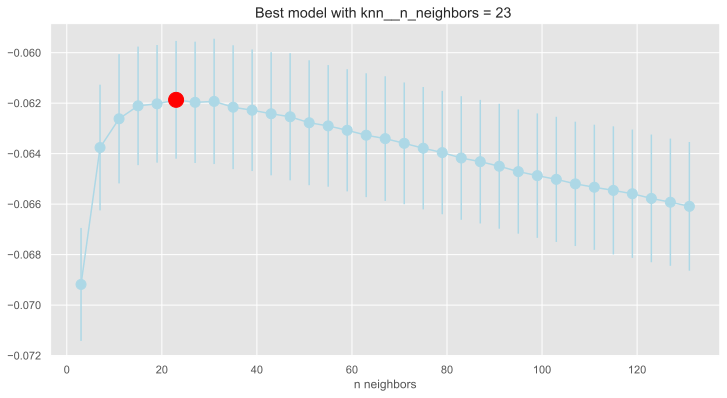

In [11]:
# Plot the cross validation score (accuracy) in the Grid Search
MT.plotModelGridError(knn_fit)

In [8]:
dfTR_eval = X_train.copy()
dfTR_eval['y'] = y_train
dfTS_eval = X_test.copy()
dfTS_eval['y'] = y_test

In [17]:
# Evaluate model in training and test
dfTR_eval['KNN_pred'] = knn_fit.predict(X_train[INPUTS_KNN])
dfTS_eval['KNN_pred'] = knn_fit.predict(X_test[INPUTS_KNN])

In [18]:
#Training and test MAE - Mean Absolute error
print('Training MAE:',mean_absolute_error(dfTR_eval['y'], dfTR_eval['KNN_pred']))
print('Test MAE:',mean_absolute_error(dfTS_eval['y'], dfTS_eval['KNN_pred']))
print('Training RMSE:',math.sqrt(mean_squared_error(dfTR_eval['y'], dfTR_eval['KNN_pred'])))
print('Test RMSE:',math.sqrt(mean_squared_error(dfTS_eval['y'], dfTS_eval['KNN_pred'])))
print('Training R2:',r2_score(dfTR_eval['y'], dfTR_eval['KNN_pred']))
print('Test R2:',r2_score(dfTS_eval['y'], dfTS_eval['KNN_pred']))

Training MAE: 0.029974225293467334
Test MAE: 0.032203763504616255
Training RMSE: 0.05915875199140003
Test RMSE: 0.06316831160601714
Training R2: 0.9414316500644591
Test R2: 0.9345751858463618


## MLP

In [9]:
## Inputs of the model. Change accordingly to perform variable selection
INPUTS_MLP_NUM = ["dia_mes","IRRAD_VALUE"]
INPUTS_MLP_CAT = ['HOUR']
INPUTS_MLP = INPUTS_MLP_NUM + INPUTS_MLP_CAT

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Prepare the categorical variables by encoding the categories
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor to perform the steps defined above
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, INPUTS_MLP_NUM),
        ('cat', categorical_transformer, INPUTS_MLP_CAT)
        ])

param = {'MLP__alpha': [0.0001,0.001,0.01], # Initial value of regularization
         'MLP__hidden_layer_sizes':[(5,),(13,),(20,),(25,)]} # Number of neurons in each hidden layer, enters as tuples

pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('MLP', MLPRegressor(solver='lbfgs', # Update function
                activation='logistic', # Logistic sigmoid activation function
                max_iter=450, # Maximum number of iterations
                tol=1e-4, # Tolerance for the optimization
                random_state=150,
                verbose = True))]) # For replication

# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
MLP_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                       param_grid=param, # Defined grid to search in
                       n_jobs=-1, # Number of cores to use (parallelize)
                       scoring='neg_mean_squared_error', # RMSE https://scikit-learn.org/stable/modules/model_evaluation.html
                       cv=nFolds) # Number of Folds 
MLP_fit.fit(X_train[INPUTS_MLP], y_train) # Search in grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dia_mes',
                                                                          'IRRAD_VALUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HOUR'])])),
                                       ('MLP',
                                        MLPRegressor(activation='logistic',
                                                     max_iter=450,
                                                     random_state=150,
                                                     solver='lbfgs',
                                                     verbose=True))]),
             n_jobs=-1,
             param_grid={'MLP__alpha': [0.0001, 0.001, 0.01],
                         'MLP__hidden_layer_sizes': [(5,), (13,), (20,),
                                                     (25,)]},
             scoring='neg_mean_squared_error')

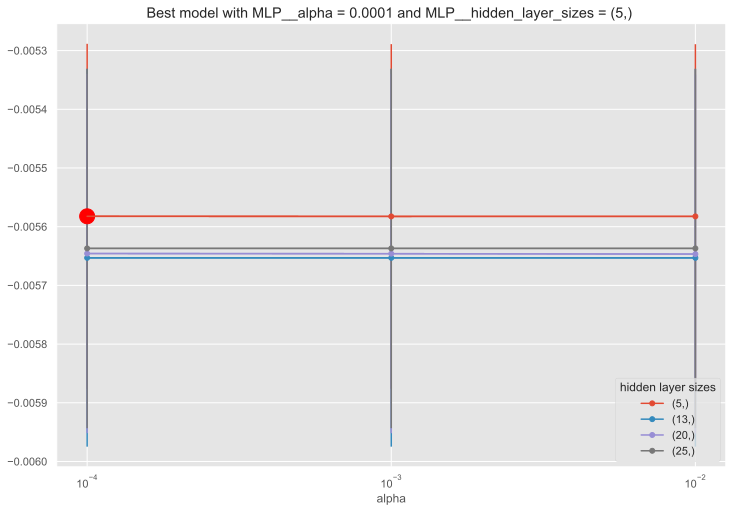

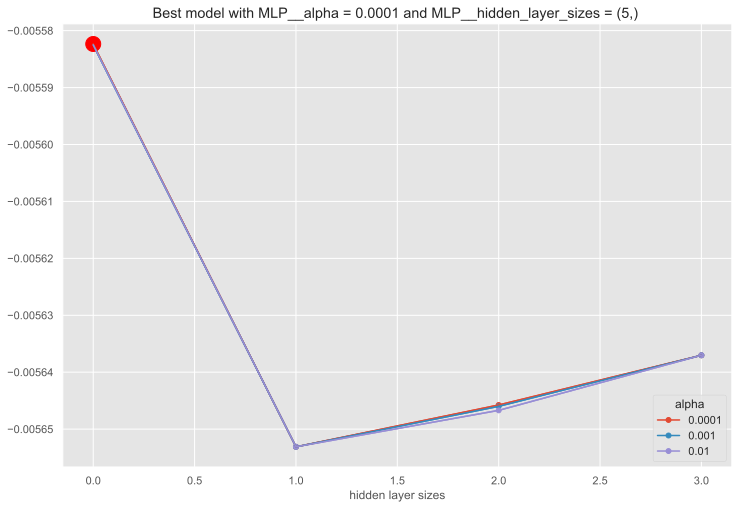

In [10]:
# Plot the cross validation score in the Grid Search
MT.plotModelGridError(MLP_fit, xscale="log")

In [11]:
## Obtain a report of the model based on predictions ---------------------------------------------
dfTR_eval['MLP_pred'] = MLP_fit.predict(X_train)
### Scale test using preprocess in training
dfTS_eval['MLP_pred'] = MLP_fit.predict(X_test)

In [12]:
#Training and test MAE - Mean Absolute error
print('Training MAE:',mean_absolute_error(dfTR_eval['y'], dfTR_eval['MLP_pred']))
print('Test MAE:',mean_absolute_error(dfTS_eval['y'], dfTS_eval['MLP_pred']))
#Training and test RMSE - Root Mean Square Error
print('Training RMSE:',math.sqrt(mean_squared_error(dfTR_eval['y'], dfTR_eval['MLP_pred'])))
print('Test RMSE:',math.sqrt(mean_squared_error(dfTS_eval['y'], dfTS_eval['MLP_pred'])))
#Training and test r^2 
print('Training R2:',r2_score(dfTR_eval['y'], dfTR_eval['MLP_pred']))
print('Test R2:',r2_score(dfTS_eval['y'], dfTS_eval['MLP_pred']))

Training MAE: 0.044768271426310784
Test MAE: 0.046575772253820764
Training RMSE: 0.0746280529671248
Test RMSE: 0.07587388647294413
Training R2: 0.9067971476141343
Test R2: 0.9056094274421774
